In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt


In [2]:
# The dataset was obtained through web scraping from Amazon. More than 1700 books were scraped, fetching the most important information for each book. Duplicated were deleted, each column was formatted and made easy to use for data analysis purposes. Rows containing a lot of missing values were deleted, and in some cases, were filled with an appropriate value based on the column. Thus, the total number of books passed from 1788 to 946. The dataset contains 946 books obtained from scraping Amazon books related to data science, statistics, data analysis, Python, deep learning, and machine learning. There are 18 columns:

In [139]:
dataset = pd.read_csv('final_book_dataset.csv', sep=',')
print(dataset.shape)
dataset.head()

(830, 19)


,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


In [140]:
# Filtrar os livros de data science, statistics, data analysis, Python, deep learning, and machine learning que em mais de 50% das avaliações receberam 5 estrelas.
stars = dataset['star5'] = dataset['star5'].str.replace('%', '').astype(float)
stars = dataset[dataset['star5'] >= 30.0]

# Verificando dados nulos e ajustando pela mediana
print(stars['price'].isna().sum())
print(stars['price'].shape)
mediana = stars['price'].median()
stars.loc[:, 'price'] = stars['price'].fillna(mediana)
stars.head()
print(stars.shape)
print(stars['price'].isna().sum())

63
(699,)
(699, 19)
0


In [185]:
# Filtrar os livros que receberam 5 estrelas com páginas > 300.
livros = stars.loc[:, 'pages'] = pd.to_numeric(stars['pages'], errors='coerce')
livros = stars[(stars['pages'] >= 300) & (stars['price'] >= 20) & (stars['price'] <= 70)]
print(livros.shape)



(317, 19)


In [186]:
# Calcular as medidas de centralidade da nota do primeiro período.
precos = livros['price']
media = np.mean(precos)
mediana = np.median(precos)
quartis = np.quantile(precos, [0, 0.25, 0.5, 0.75, 1])
desvio_padrao = np.std(precos)
variancia = np.var(precos)
print(f"Média: {media:.2f}")
print(f"Médiana: {mediana:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")


Média: 42.43
Médiana: 42.00
Quartis: [20.   34.95 42.   49.99 70.  ]
Desvio Padrão: 11.63
Variância: 135.19


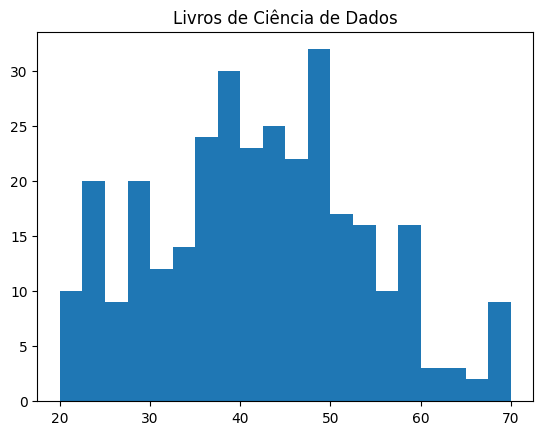

In [187]:
# Teste de Normalidade - Histograma
plt.hist(precos, bins=20)
plt.title('Livros de Ciência de Dados')
plt.show()


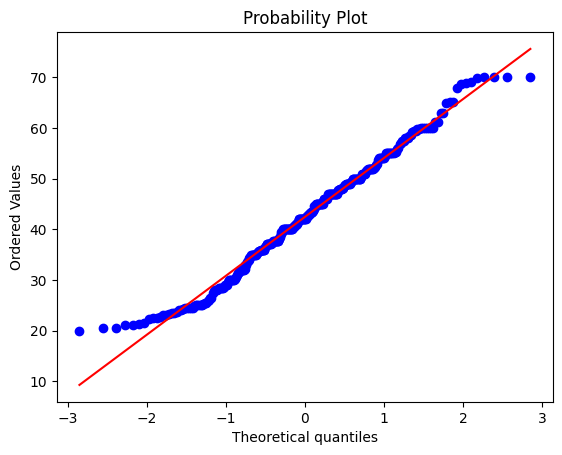

In [188]:
# Teste de Normalidade - Q-Q Plot
fig, ax = plt.subplots()
stats.probplot(precos, fit=True, plot=ax)
plt.show()

In [189]:
# Teste de Normalidade Shapiro-Wilker
stats.shapiro(precos)

ShapiroResult(statistic=np.float64(0.9841967277224164), pvalue=np.float64(0.0014779929397297485))

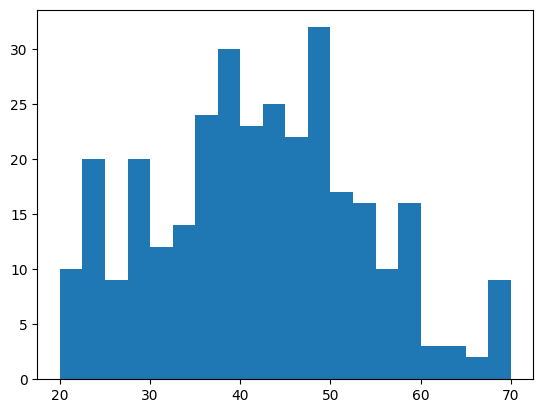

In [190]:
# Apesar de, o Teste de Shapiro-Wilk, e Q-Q Plot, descartar que os dados estão distribuídos normalmente de livros com 300 páginas ou mais, que receberam 50% ou mais de avalições 5 estrelas, analisando o gráfico de histograma, há uma tendência a simetria, de os dados estarem em torno da média. Talvez isso se deva aos dados no extremos da amostra, mesmo aplicando um filtro no dataset, outro fator é que o tamanho da amostra ser pouco representativa.

plt.hist(precos, bins=20)
plt.show()

In [192]:
# Como pode ser visto no Histograma, há uma tendência de uma maior quantidade de livros com páginas >= 300 e 20 >= preços <= 70 estarem junto a média,

In [209]:
# Considerando que os dados estão normalmente distribuídos, vamos achar a probabilidade de o preço de um livro ser maior que 30 dolares e menor ou igual 50 doláres.
print(f"{(norm.cdf(50, media, desvio_padrao) - norm.cdf(30, media, desvio_padrao)) * 100:.2f}%")


60.00%


In [210]:
# Conclusão: 60% dos livros que têm avaliações 5 estrelas por mais da metade dos reviews, e com 300 páginas ou mais, têm preços entre 30 dólares e 50 dólares.